<a href="https://colab.research.google.com/github/isabellapal/Talleres/blob/main/Taller_II_Corte_Isabella_Palomino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller II Corte

###Isabella Palomino Yepez 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('archivo.csv')
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
1,30000001,mujer,25,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
2,30000001,mujer,1,nieto,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
4,30000011,mujer,14,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46322,30195701,mujer,16,hijo,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46323,30195701,mujer,76,otro_pariente,viudo,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0
46324,30202911,hombre,61,jefe_hogar,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0
46325,30202911,mujer,60,pareja,casado,si,visita_parientes,personas_hogar_compartir_gastos,QUINDIO,ARMENIA,...,si,no,no,no,no,si,NaN,pension,NaN,4000000.0


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

####Las variables que se tendrán en cuenta para analizar  son: edad, estrato, estado civil y parentesco jefe hogar 

##Organizado la información

In [175]:
#edad
df['edad'].value_counts(dropna = False)

24     841
26     838
19     837
22     835
15     827
      ... 
100      5
98       5
99       3
102      2
105      1
Name: edad, Length: 103, dtype: int64

In [176]:
#filtrando la edad a los mayores de 18
df = df[(df['edad']>=18)]

In [177]:
df_edad = pd.crosstab(df['edad'],df['viaje_noche_fuera'])
df_edad

viaje_noche_fuera,no,si
edad,,
18,725,80
19,757,80
20,732,87
21,655,101
22,725,110
...,...,...
98,4,1
99,3,0
100,5,0


In [51]:
df_edad.sort_values(by = 'edad', ascending = True)

viaje_noche_fuera,no,si
edad,,
18,725,80
19,757,80
20,732,87
21,655,101
22,725,110
...,...,...
98,4,1
99,3,0
100,5,0


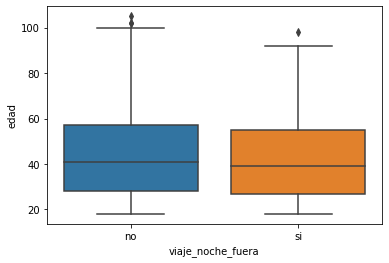

In [178]:
sns.boxplot(data = df, x = 'viaje_noche_fuera', y = 'edad')

In [179]:
df_edad.describe()

viaje_noche_fuera,no,si
count,85.000000,85.000000
mean,358.517647,42.352941
std,245.187956,32.795073
min,1.000000,0.000000
25%,116.000000,8.000000
50%,421.000000,45.000000
75%,543.000000,69.000000
max,757.000000,110.000000


In [180]:
#estrato
df['estrato'].value_counts()

2.0    12169
1.0     9267
3.0     9008
4.0     2336
5.0      669
6.0      503
0.0      101
9.0        3
Name: estrato, dtype: int64

In [181]:
df_estrato = df[df['estrato']!=9]
df_estrato = pd.crosstab(df['estrato'], df['viaje_noche_fuera'])
df_estrato

viaje_noche_fuera,no,si
estrato,,
0.0,99,2
1.0,8684,583
2.0,11078,1091
3.0,7777,1231
4.0,1973,363
5.0,498,171
6.0,345,158
9.0,3,0


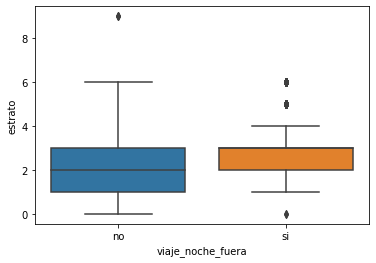

In [182]:
sns.boxplot(data = df, x = 'viaje_noche_fuera', y = 'estrato')

In [183]:
df_estrato.describe()

viaje_noche_fuera,no,si
count,8.000000,8.000000
mean,3807.125000,449.875000
std,4581.509902,479.941793
min,3.000000,0.000000
25%,283.500000,119.000000
50%,1235.500000,267.000000
75%,8003.750000,710.000000
max,11078.000000,1231.000000


In [184]:
#estado_civil
df['estado_civil'].value_counts()

soltero                  9977
pareja_union_libre       8691
casado                   8198
separado_divorciado      4620
viudo                    1911
pareja_no_union_libre     677
Name: estado_civil, dtype: int64

In [185]:
#excluyendo a los menores de 18 que están solteros
df_edad_estado_civil = pd.crosstab(df['edad'], df['estado_civil'])
df_edad_estado_civil


estado_civil,casado,pareja_no_union_libre,pareja_union_libre,separado_divorciado,soltero,viudo
edad,,,,,,
18,0,25,34,20,726,0
19,8,38,52,20,717,2
20,9,39,91,19,661,0
21,15,43,108,26,564,0
22,20,42,120,42,610,1
...,...,...,...,...,...,...
98,1,0,1,0,0,3
99,0,0,0,0,2,1
100,0,0,0,0,0,5


In [186]:
df_estado_civil = pd.crosstab(df['estado_civil'], df['viaje_noche_fuera'])
df_estado_civil

viaje_noche_fuera,no,si
estado_civil,,
casado,7148,1050
pareja_no_union_libre,581,96
pareja_union_libre,7900,791
separado_divorciado,4206,414
soltero,8876,1101
viudo,1763,148


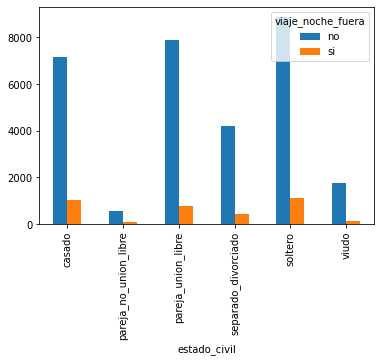

In [57]:
df_estado_civil.plot(kind = 'bar')

In [58]:
df_estado_civil.describe()

viaje_noche_fuera,no,si
count,6.000000,6.000000
mean,5078.500000,600.000000
std,3424.240806,443.372981
min,581.000000,96.000000
25%,2373.750000,214.500000
50%,5677.000000,602.500000
75%,7710.500000,985.250000
max,8875.000000,1101.000000


In [187]:
#parentesco con el jefe_hogar
df['parentesco_jefe_hogar'].value_counts()

jefe_hogar            14010
hijo                   7706
pareja                 7429
otro_pariente          3368
otro_no_pariente        713
nieto                   686
empleado_domestico      119
pensionista              30
trabajador               13
Name: parentesco_jefe_hogar, dtype: int64

In [188]:
#excluyendo a los que no sean jefes de hogar
df = df[df['parentesco_jefe_hogar'] == 'jefe_hogar']

In [189]:
df_parentesco_viajes = pd.crosstab(df['parentesco_jefe_hogar'], df['viaje_noche_fuera'])
df_parentesco_viajes

viaje_noche_fuera,no,si
parentesco_jefe_hogar,,
jefe_hogar,12347,1663


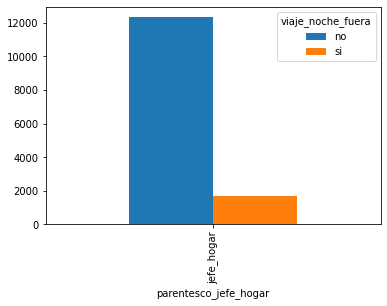

In [86]:
df_parentesco_viajes.plot(kind = 'bar')

In [194]:
df

,LLAVE_HOGAR,sexo,edad,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,motivo_viaje,compañía_viaje,destino_depto,destino_municipio,...,ingresos_jubilación_invalidez,ingresos_sostenimiento_menores,ingresos_subsidios_vivienda,ingresos_subsidios_educación,ingresos_arriendos_finca_raiz,ingresos_transferencias,ninguna_fuente_ingresos,principal_fuente_ingreso,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
0,30000001,mujer,56,jefe_hogar,soltero,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,880000.0
3,30000011,mujer,39,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,no,no,no,si,no,no,NaN,salario_independiente,NaN,860000.0
6,30000021,mujer,68,jefe_hogar,viudo,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,1050000.0
7,30000031,hombre,34,jefe_hogar,pareja_no_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,820000.0
10,30000041,hombre,25,jefe_hogar,pareja_union_libre,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46305,30175011,mujer,63,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,9000000.0
46309,30195681,mujer,66,jefe_hogar,separado_divorciado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,si,NaN,salario_independiente,NaN,828116.0
46316,30195691,hombre,71,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,si,no,no,no,no,no,NaN,pension,NaN,5000000.0
46320,30195701,hombre,50,jefe_hogar,casado,no,NaN,NaN,NaN,NaN,...,no,no,no,no,no,no,NaN,salario_independiente,NaN,3800000.0


##Modelamiento

In [156]:
import statsmodels.api as sm           
import statsmodels.formula.api as smf

In [190]:
df.describe()

,LLAVE_HOGAR,edad,monto_ultimo_viaje,num_viajes_12_meses,gastos_alojamiento_valor,gastos_transporte_valor,gastos_trans_publico_lugar_valor,gastos_bienes_personales_valor,gastos_regalos_valor,gastos_otros_valor,gastos_transporte_aereo_valor,grado_alcanzado,estrato,ingreso_mensual_aprox_sin_fuentes,ingreso_mensual_aprox
count,1.401000e+04,14010.000000,1.613000e+03,1596.000000,3.590000e+02,1.226000e+03,437.000000,2.620000e+02,2.630000e+02,3.880000e+02,1.570000e+02,14010.000000,13998.000000,2.360000e+02,1.377400e+04
mean,3.008611e+07,50.083583,5.973017e+05,2.124060,3.245982e+05,1.172256e+05,66059.922197,1.363499e+05,1.461878e+05,1.431010e+05,4.645215e+05,6.311991,2.261752,9.487635e+05,1.605977e+06
std,5.170463e+04,16.299908,1.034039e+06,4.242451,5.688750e+05,1.439620e+05,87130.204109,2.162005e+05,1.883994e+05,2.083778e+05,5.724374e+05,3.899747,1.109267,6.282410e+05,1.651754e+06
min,3.000000e+07,18.000000,0.000000e+00,1.000000,9.800000e+01,9.800000e+01,98.000000,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,0.000000,0.000000,9.800000e+01,9.800000e+01
25%,3.003576e+07,37.000000,1.100000e+05,1.000000,6.250000e+04,4.000000e+04,20000.000000,3.000000e+04,5.000000e+04,4.000000e+04,2.000000e+05,3.000000,1.000000,6.000000e+05,8.000000e+05
50%,3.009010e+07,50.000000,3.000000e+05,1.000000,1.500000e+05,8.000000e+04,40000.000000,6.000000e+04,1.000000e+05,9.000000e+04,3.000000e+05,5.000000,2.000000,8.270000e+05,1.150000e+06
75%,3.013268e+07,62.000000,6.000000e+05,1.000000,3.000000e+05,1.500000e+05,80000.000000,1.500000e+05,2.000000e+05,1.700000e+05,5.100000e+05,11.000000,3.000000,1.000000e+06,2.000000e+06
max,3.020291e+07,102.000000,1.436000e+07,98.000000,5.000000e+06,2.000000e+06,800000.000000,1.600000e+06,1.500000e+06,1.900000e+06,4.000000e+06,99.000000,9.000000,4.600000e+06,3.000000e+07


In [196]:
df = pd.get_dummies(df, drop_first = True)

In [203]:
X = df.copy()
y = X.pop('viaje_noche_fuera')
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()


KeyError: ignored

In [197]:
y = df['viaje_noche_fuera']
x = df['parentesco_jefe_hogar']
x = sm.add_constant(x)
model = sm.OLS(y,x)
reg = model.fit()
reg.summary()

KeyError: ignored